# **Diabetes Prediction**
---
### **Descripción del Proyecto**

👉 ¿Podemos predecir si una persona tiene diabetes usando sus datos médicos?
- Se utiliza un conjunto de datos médicos de pacientes con distintos indicadores de salud
- Se usa un algoritmo llamado Random Forest
- Cada árbol de decisión sería como un médico que da su opinión
- El bosque entero (conjunto de árboles de decisión) toma una decisión final basada en la mayoría
- El objetivo es predecir si un paciente tiene o no diabetes en base a esos indicadores
- Finalmente se evalúa qué tan bien funciona el modelo y qué factores médicos influyen más en la predicción

Siguiendo estos pasos:
1. Carga de datos: importamos un dataset médico obtenido de kaggle. Tomado de Hospital de Frankfurt, Alemania (https://www.kaggle.com/johndasilva/diabetes)
2. Exploración y Visualización
3. Transformación
4. Split de datos
5. Modelo: entrenamos un Random Forest Classifier, que combina múltiples árboles de decisión para mejorar precisión y reducir sobreajuste
6. Evaluación: calculamos métricas como accuracy, precision, recall y F1-score para medir la calidad de la predicción
7. Análisis Final e Interpretación: analizamos la importancia de cada variable

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Carga de Datos**

In [44]:
df = pd.read_csv('./data/diabetes_dataset.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
...,...,...,...,...,...,...,...,...,...
1995,2,75,64,24,55,29.7,0.370,33,0
1996,8,179,72,42,130,32.7,0.719,36,1
1997,6,85,78,0,0,31.2,0.382,42,0
1998,0,129,110,46,130,67.1,0.319,26,1


### **EDA**
---

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


**Qué significa cada instancia/fila?**

- **Pregnancies** – número de veces que la persona estuvo embarazada.
- **Glucose** – nivel de glucosa en sangre.
- **BloodPressure** – presión arterial (mmHg).
- **SkinThickness** – grosor de la piel (mm).
- **Insulin** – nivel de insulina (mu U/ml).
- **BMI** – índice de masa corporal.
- **DiabetesPedigreeFunction** – función de pedigree diabético (probabilidad hereditaria asociada a diabetes).
- **Age** – edad en años.
- **Outcome** – variable objetivo: 1 si el paciente tiene diabetes, 0 si no tiene.

In [46]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,2000.0,3.70350,3.306063,0.000,1.000,3.000,6.000,17.00
Glucose,2000.0,121.18250,32.068636,0.000,99.000,117.000,141.000,199.00
BloodPressure,2000.0,69.14550,19.188315,0.000,63.500,72.000,80.000,122.00
SkinThickness,2000.0,20.93500,16.103243,0.000,0.000,23.000,32.000,110.00
Insulin,2000.0,80.25400,111.180534,0.000,0.000,40.000,130.000,744.00
BMI,2000.0,32.19300,8.149901,0.000,27.375,32.300,36.800,80.60
DiabetesPedigreeFunction,2000.0,0.47093,0.323553,0.078,0.244,0.376,0.624,2.42
Age,2000.0,33.09050,11.786423,21.000,24.000,29.000,40.000,81.00
Outcome,2000.0,0.34200,0.474498,0.000,0.000,0.000,1.000,1.00


In [47]:
df['Outcome'].value_counts()

Outcome
0    1316
1     684
Name: count, dtype: int64

In [48]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**Vemos que hay algunos columnas que contienen valor 0, lo cuál no es correcto por lo tanto lo tomaremos como datos faltantes**

### **Visualización**
--- 


**PairPlot**

In [70]:
sns.set_style('darkgrid')

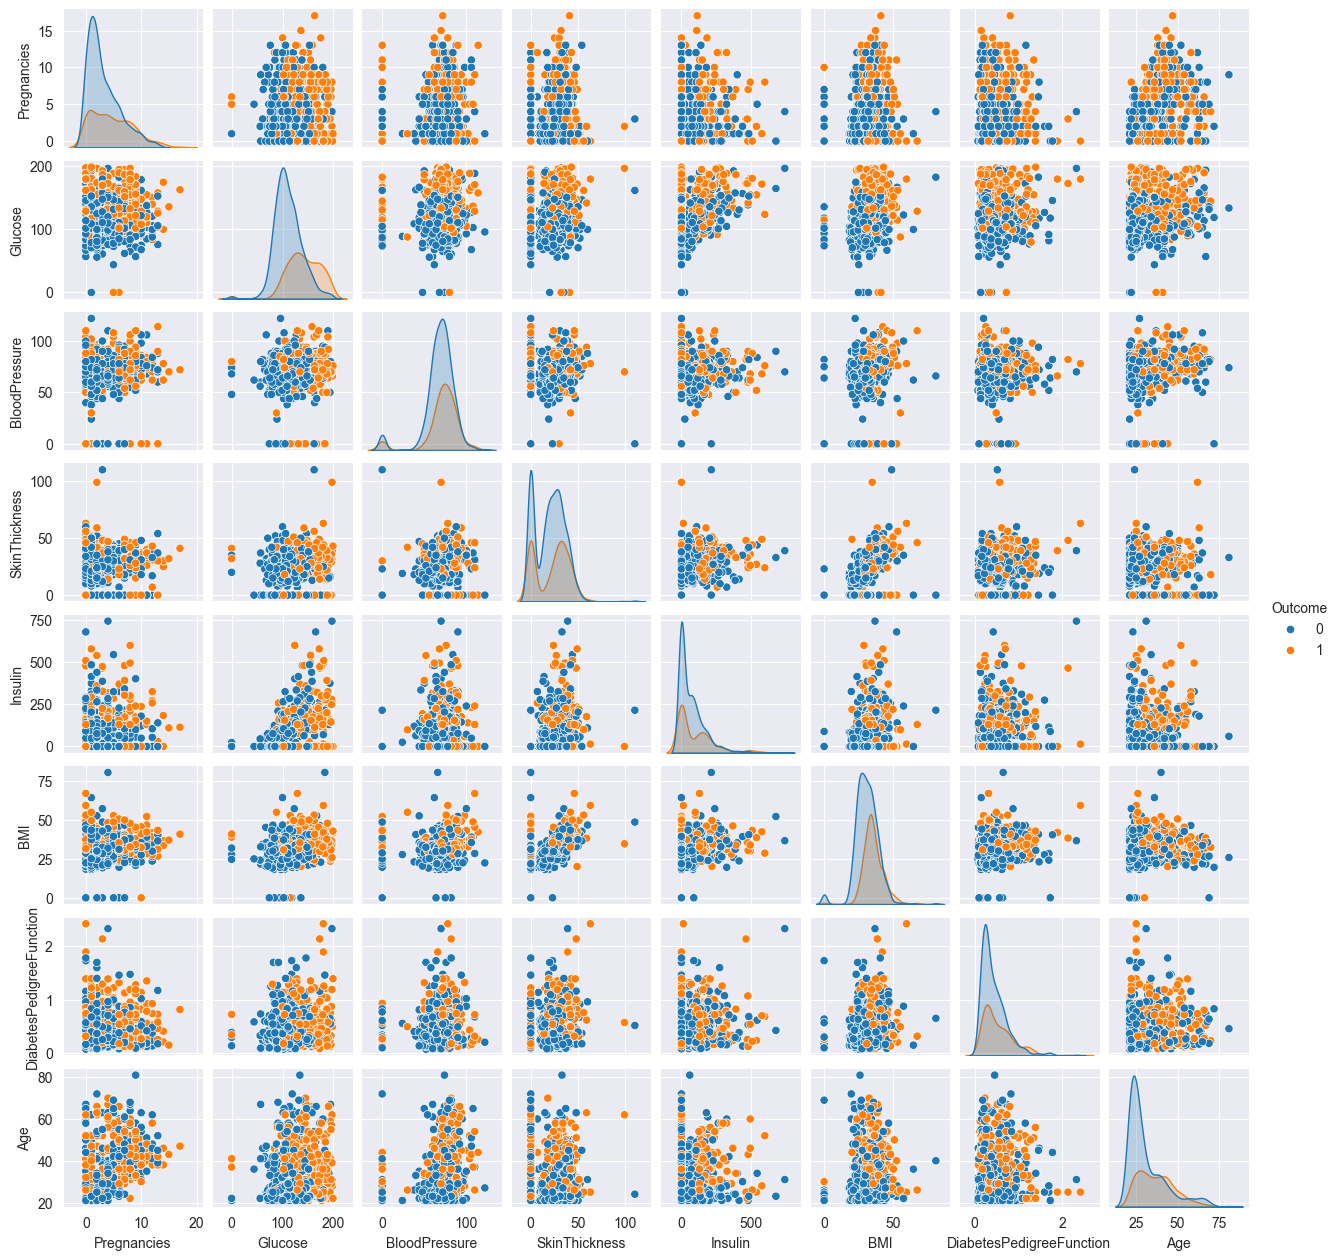

In [71]:
sns.pairplot(df, hue='Outcome', height=1.6)

In [50]:
df.columns.values

array(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype=object)

**BoxPlots - Distribuciones**

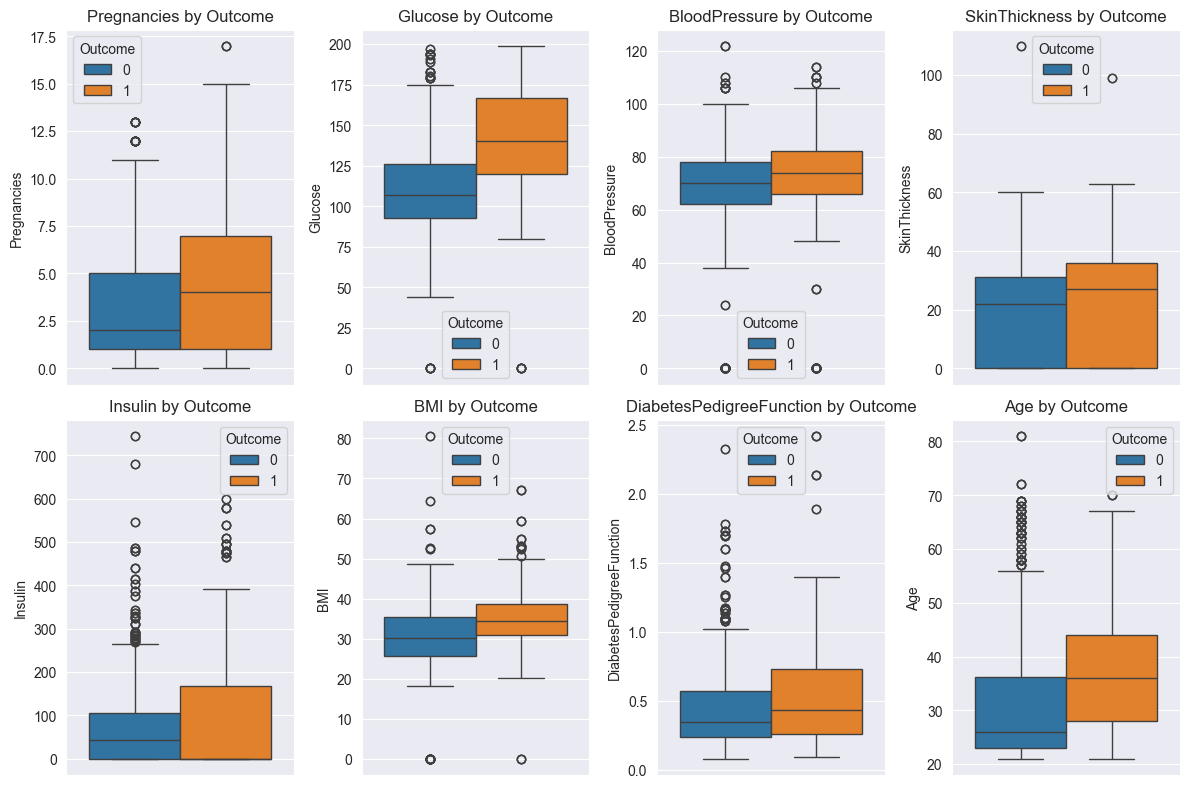

In [72]:
features = df.columns.values
features = features[:-1]

fig, axes = plt.subplots(2,4, figsize=(12, 8))
for ax, feature in zip(axes.flatten(), features):
    sns.boxplot(data=df, y=feature, hue='Outcome', ax=ax)
    ax.set_title(f"{feature} by Outcome")

plt.tight_layout()
plt.show()

<Axes: xlabel='Outcome', ylabel='Count'>

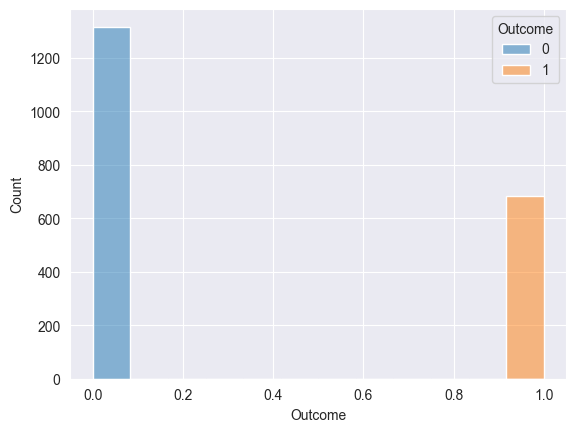

In [73]:
sns.histplot(df,x='Outcome', hue='Outcome')

### **Transformación**
---


**Manejo de valores nulos en columnas específicas**

In [74]:
df_2 = df.copy()
df_2[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_2[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.nan)
df_2.isnull().sum()

Pregnancies                   0
Glucose                      13
BloodPressure                90
SkinThickness               573
Insulin                     956
BMI                          28
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

**Para poder manejar los valores nulos debemos conocer las distribuciones**

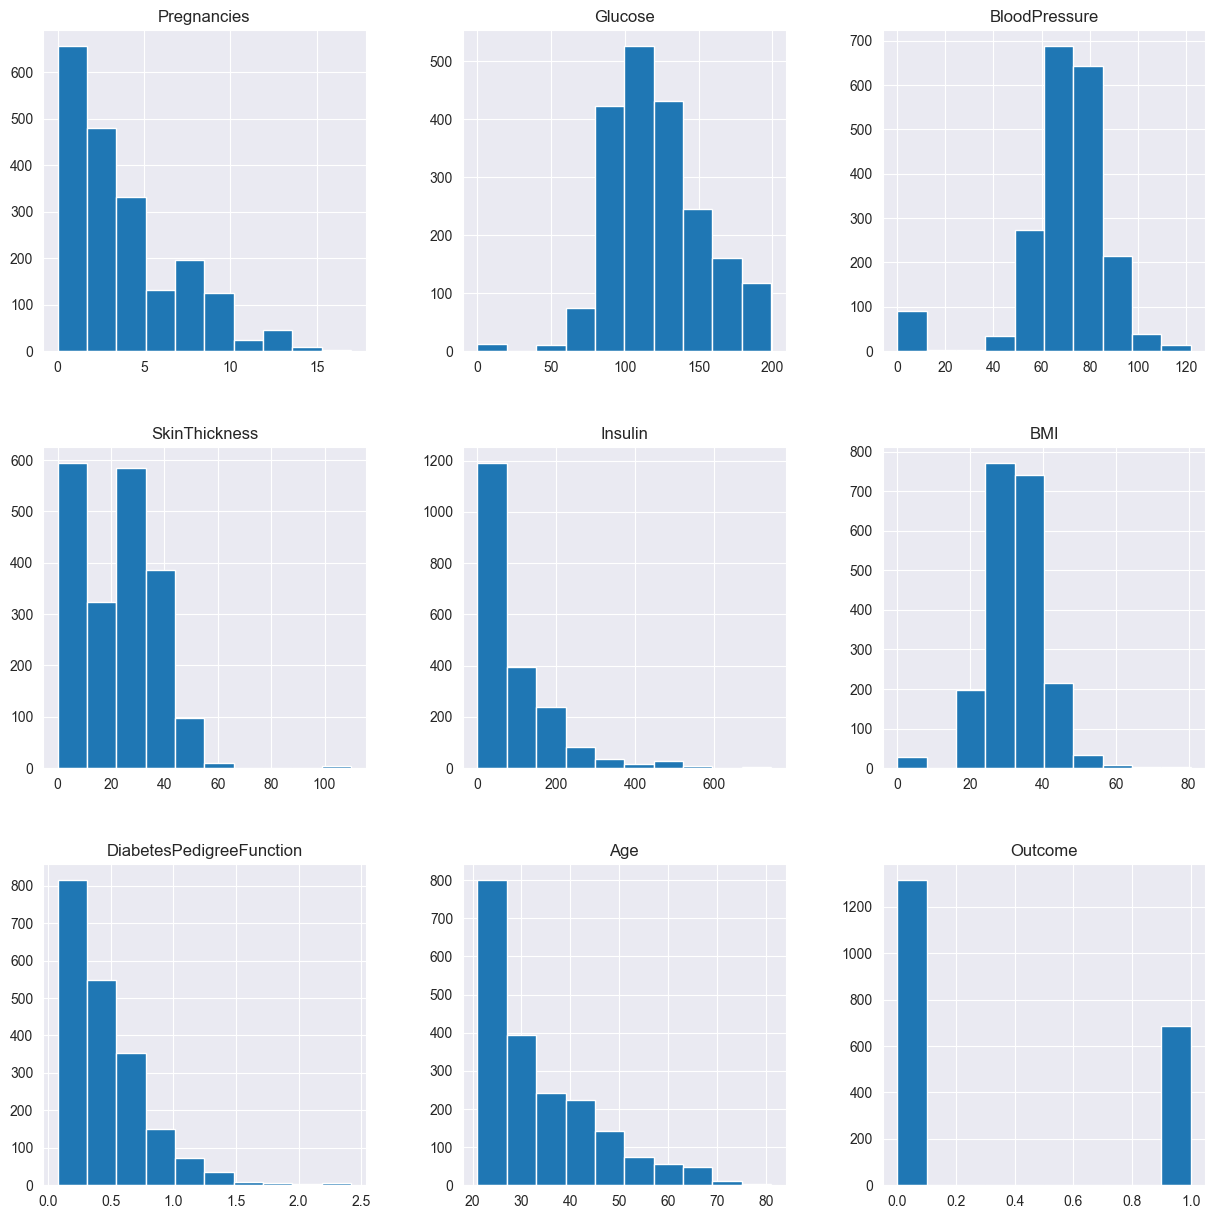

In [85]:
p = df_2.hist(figsize=(15,15))

In [86]:
df_2['Glucose'] = df_2['Glucose'].fillna(df_2['Glucose'].mean(), inplace=True)
df_2['BloodPressure'] = df_2['BloodPressure'].fillna(df_2['BloodPressure'].mean(), inplace=True)
df_2['SkinThickness'] = df_2['SkinThickness'].fillna(df_2['SkinThickness'].median(), inplace=True)
df_2['Insulin'] = df_2['Insulin'].fillna(df_2['Insulin'].median(), inplace=True)
df_2['BMI'] = df_2['BMI'].fillna(df_2['BMI'].median(), inplace=True)

C:\Users\nicol\AppData\Local\Temp\ipykernel_28184\121718427.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_2['Glucose'] = df_2['Glucose'].fillna(df_2['Glucose'].mean(), inplace=True)
C:\Users\nicol\AppData\Local\Temp\ipykernel_28184\121718427.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always

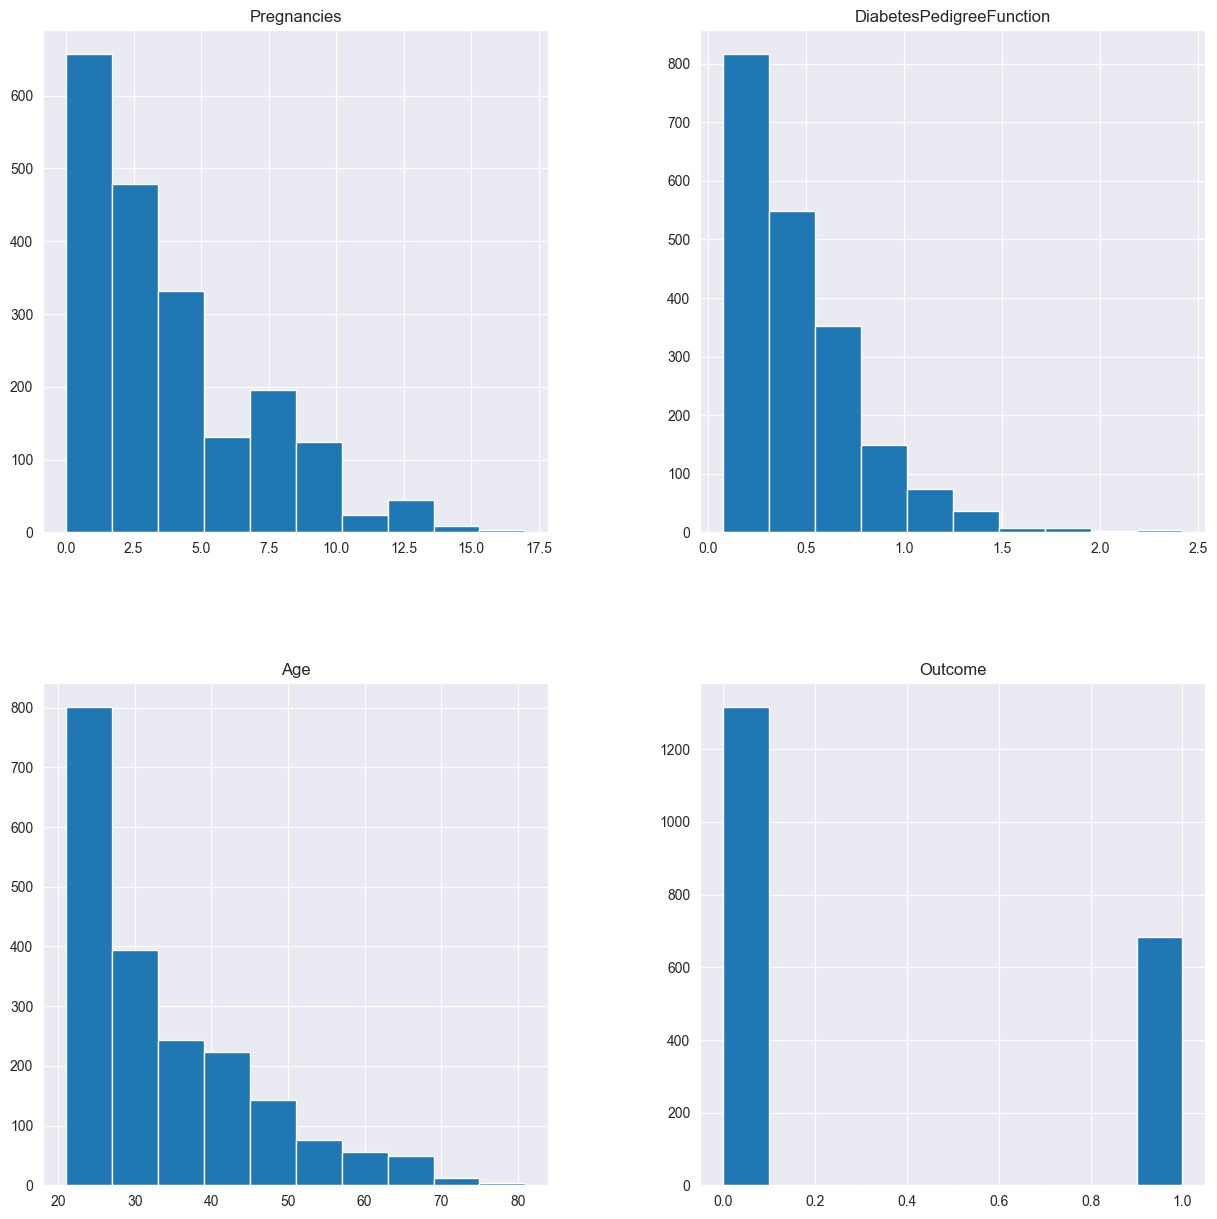

In [87]:
p = df_2.hist(figsize=(15,15))

In [88]:
df_2.isnull().sum()

Pregnancies                    0
Glucose                     2000
BloodPressure               2000
SkinThickness               2000
Insulin                     2000
BMI                         2000
DiabetesPedigreeFunction       0
Age                            0
Outcome                        0
dtype: int64

In [89]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   0 non-null      object 
 2   BloodPressure             0 non-null      object 
 3   SkinThickness             0 non-null      object 
 4   Insulin                   0 non-null      object 
 5   BMI                       0 non-null      object 
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 140.8+ KB


In [90]:
cols = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

for col in cols:
    df_2[col] = pd.to_numeric(df[col], errors="coerce")


In [91]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


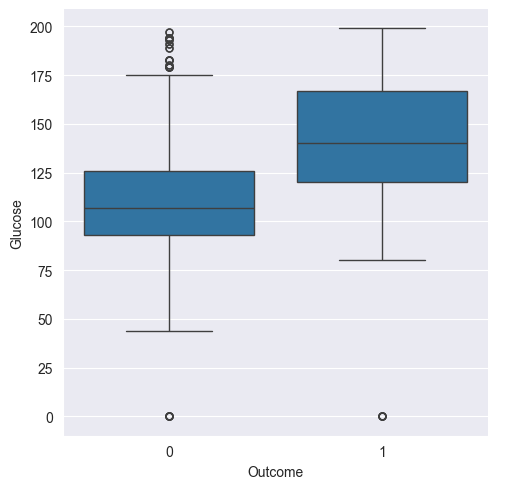

In [93]:
sns.catplot(df_2,x='Outcome',y='Glucose',kind='box')

In [95]:
sns.pieplot(df_2,hue='Outcome')

AttributeError: module 'seaborn' has no attribute 'pieplot'

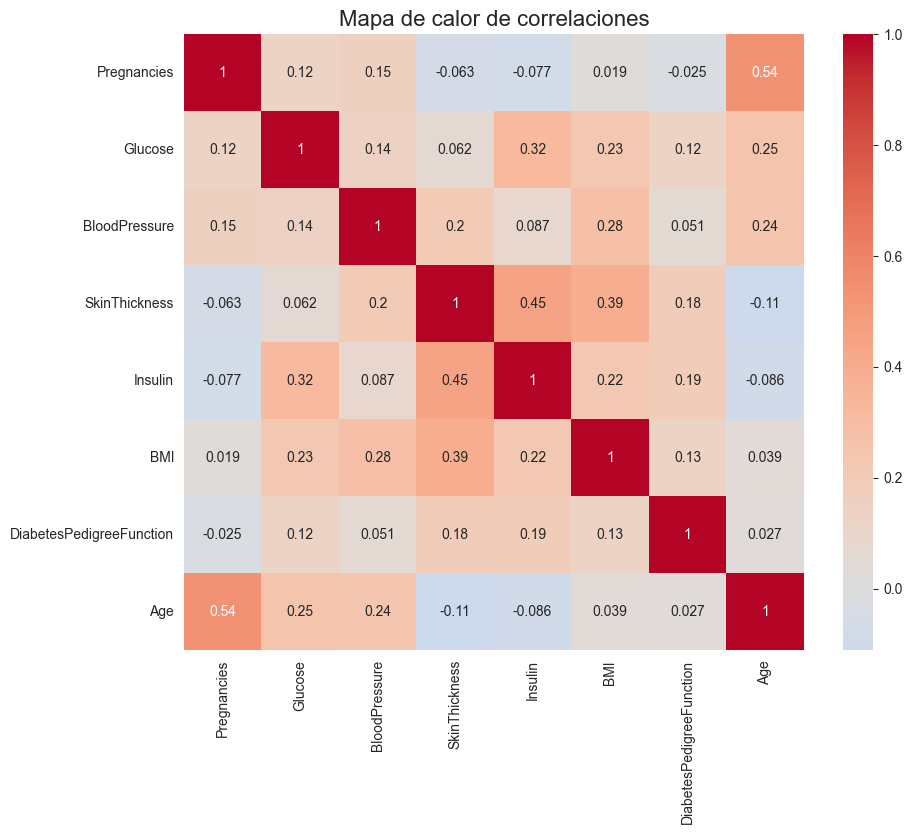

In [92]:
dfc = df_2.iloc[:,:-1]
corr = dfc.corr()   # calculamos la matriz de correlación

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Mapa de calor de correlaciones", fontsize=16)
plt.show()

## **Modelado**
---

### **Data Splitting**

In [94]:
from sklearn.model_selection import train_test_split

X = df_2.drop(columns='Outcome')
y = df_2['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
print('X_train size: {}, X_test size: {}'.format(X_train.shape, X_test.shape))

X_train size: (1600, 8), X_test size: (400, 8)


### **Random Forest**

In [96]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#Parámetros Simples
rf = RandomForestClassifier(
    n_estimators=100,   
    max_depth=None,   
    random_state=42
)

rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [98]:
cm = confusion_matrix(y_test, y_pred)

In [99]:
y_pred = rf.predict(X_test)

# Métricas
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nMatriz de confusión:\n", cm)
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))


Accuracy: 0.995

Matriz de confusión:
 [[272   0]
 [  2 126]]

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       272
           1       1.00      0.98      0.99       128

    accuracy                           0.99       400
   macro avg       1.00      0.99      0.99       400
weighted avg       1.00      0.99      0.99       400



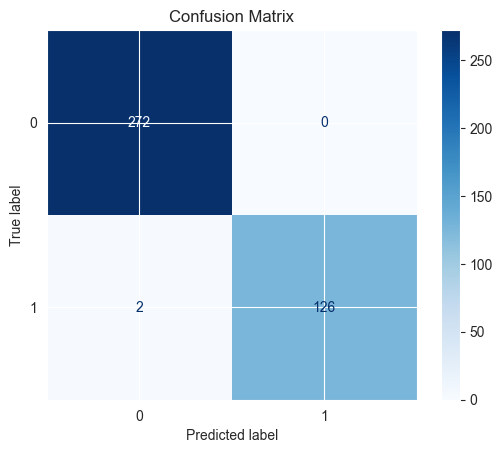

In [101]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.show()

**Resultados**
- La precisión del Random Forest es: 99,5%
- Se predijo 2 falsos negativos